In [10]:
import pandas as pd

In [18]:
d = pd.read_csv('11.csv',dtype={'ID':'str','householdID':'str'},index_col=0)

In [21]:
d.head()

,ID,householdID,sysbp,diabp,pulse,peakflow,grip,walktime,bloodweight,qc1_va003,...,dlrc,ser7,orient,draw,tr20,birth,birthm,iyear,imonth,age
0,10104101002,101041010,123.666664,67.333336,55.333332,200.00000,43.0,NaN,32381.557,1.0,...,7.0,5.0,4.0,0.no,17.0,1963.0,5.0,2011,7,48.166668
1,10104102002,101041020,143.333330,74.666664,67.666664,236.66667,35.0,5.300,31800.947,1.0,...,2.0,2.0,2.0,0.no,6.0,1951.0,9.0,2011,8,59.916668
2,10104104001,101041040,178.666670,87.000000,55.000000,176.66667,30.0,4.015,31795.684,1.0,...,6.0,2.0,3.0,0.no,12.0,1950.0,9.0,2011,7,60.833332
3,10104105002,101041050,191.000000,106.333336,58.333332,560.00000,48.0,5.250,31711.080,1.0,...,7.0,5.0,3.0,0.no,13.0,1943.0,12.0,2011,8,67.666664
4,10104107001,101041070,118.333336,54.000000,53.666668,173.33333,30.0,4.700,63400.380,1.0,...,6.0,4.0,3.0,0.no,10.0,1932.0,3.0,2011,7,79.333336


In [31]:
d.ID.dtypes,d.householdID.dtypes

(dtype('O'), dtype('O'))

In [32]:
d.columns

Index(['ID', 'householdID', 'sysbp', 'diabp', 'pulse', 'peakflow', 'grip',
       'walktime', 'bloodweight', 'qc1_va003', 'wbc', 'mcv', 'plt', 'bun',
       'glu', 'crea', 'cho', 'tg', 'hdl', 'ldl', 'crp', 'hbalc', 'ua', 'htc',
       'hgb', 'cysc', 'agey', 'ragender', 'raeduc_c', 'mstat', 'rural',
       'shlta', 'dressa', 'batha', 'eata', 'beda', 'toilta', 'urina', 'moneya',
       'medsa', 'shopa', 'mealsa', 'housewka', 'joga', 'walk1kma', 'walk100a',
       'chaira', 'climsa', 'stoopa', 'lifta', 'dimea', 'armsa', 'cesd10',
       'hibpe', 'diabe', 'cancre', 'lunge', 'hearte', 'stroke', 'psyche',
       'arthre', 'dyslipe', 'livere', 'kidneye', 'digeste', 'asthmae',
       'memrye', 'bmi', 'height', 'weight', 'slfmem', 'imrc', 'dlrc', 'ser7',
       'orient', 'draw', 'tr20', 'birth', 'birthm', 'iyear', 'imonth', 'age'],
      dtype='object')

In [33]:
d.walktime.isna().value_counts()

True     5776
False    4361
Name: walktime, dtype: int64

In [34]:
d.cysc.isna().value_counts()

False    7592
True     2545
Name: cysc, dtype: int64

In [35]:
d.age.isna().value_counts()

False    10125
True        12
Name: age, dtype: int64

In [36]:
ID = ['ID','householdID']
bio = ['sysbp','diabp','pulse','wbc','mcv','plt','bun','glu','crea','cho','tg','hdl','ldl','crp','hbalc','ua','htc','hgb']
chronic = ['hibpe','diabe','cancre','lunge','hearte','stroke','psyche','arthre','dyslipe','livere','kidneye','digeste','asthmae','memrye']
limit = ['dressa','batha','eata','beda','toilta','urina','moneya','medsa','shopa','mealsa','housewka','joga','walk1kma','walk100a','chaira','climsa','stoopa','lifta','dimea','armsa']
cd = ['cesd10','shlta','slfmem','imrc','dlrc','ser7','orient','draw']

In [37]:
d = d[(d.age >= 40) &(d.age <= 85)]

df = d[bio+chronic+limit+cd+['age']]
df = df.dropna(subset=['age'])

In [38]:
df.shape

(10027, 61)

In [39]:
df.columns

Index(['sysbp', 'diabp', 'pulse', 'wbc', 'mcv', 'plt', 'bun', 'glu', 'crea',
       'cho', 'tg', 'hdl', 'ldl', 'crp', 'hbalc', 'ua', 'htc', 'hgb', 'hibpe',
       'diabe', 'cancre', 'lunge', 'hearte', 'stroke', 'psyche', 'arthre',
       'dyslipe', 'livere', 'kidneye', 'digeste', 'asthmae', 'memrye',
       'dressa', 'batha', 'eata', 'beda', 'toilta', 'urina', 'moneya', 'medsa',
       'shopa', 'mealsa', 'housewka', 'joga', 'walk1kma', 'walk100a', 'chaira',
       'climsa', 'stoopa', 'lifta', 'dimea', 'armsa', 'cesd10', 'shlta',
       'slfmem', 'imrc', 'dlrc', 'ser7', 'orient', 'draw', 'age'],
      dtype='object')

In [41]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='d11_stat')
profile.to_file('d11_stat.html')

In [42]:
m1 = {'1.Very good':'Very good','2.Good':'Good','3.Fair':'Fair','4.Poor':'Poor','5.Very Poor':'Very Poor'}
m2 = {'1.Excellent':'Excellent','2.Very Good':'Very Good','3.Good':'Good','4.Fair':'Fair','5.Poor':'Poor'}

df['shlta'] = df.shlta.map(m1)
df['slfmem'] = df.slfmem.map(m2)

In [43]:
df.head()

,sysbp,diabp,pulse,wbc,mcv,plt,bun,glu,crea,cho,...,armsa,cesd10,shlta,slfmem,imrc,dlrc,ser7,orient,draw,age
0,123.666664,67.333336,55.333332,9.6,72.9,198.0,19.43894,95.94,0.9831,254.3828,...,0.no,0.0,Good,Very Good,10.0,7.0,5.0,4.0,0.no,48.166668
1,143.333330,74.666664,67.666664,5.3,95.4,179.0,12.35241,94.14,0.8814,205.6712,...,0.no,6.0,Very Poor,Good,4.0,2.0,2.0,2.0,0.no,59.916668
2,178.666670,87.000000,55.000000,7.5,88.3,271.0,22.09989,105.84,1.1526,168.1710,...,0.no,3.0,Good,Fair,6.0,6.0,2.0,3.0,0.no,60.833332
3,191.000000,106.333336,58.333332,4.7,86.1,208.0,15.62958,87.48,0.6554,219.9754,...,0.no,2.0,Poor,Good,6.0,7.0,5.0,3.0,0.no,67.666664
4,118.333336,54.000000,53.666668,8.3,85.6,290.0,13.22072,95.76,0.9040,168.9442,...,0.no,6.0,Poor,Very Good,4.0,6.0,4.0,3.0,0.no,79.333336


In [44]:
from pycaret.regression import *
reg = setup(df,target='age',numeric_features=['ser7','orient','imrc','dlrc'],ordinal_features = { 'shlta' : ['Very Poor','Poor','Fair','Good','Very good']
                                                ,'slfmem' : ['Poor','Fair','Good','Very Good','Excellent']}
                                                ,normalize_method = 'minmax'
                                                ,normalize=True
                                                ,ignore_low_variance=True,remove_multicollinearity=True
                                                ,session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(10027, 61)"
4,Missing Values,True
5,Numeric Features,23
6,Categorical Features,37
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [46]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,5.9815,55.5059,7.4463,0.3669,0.1236,0.1029,10.1119
1,Light Gradient Boosting Machine,6.0844,56.7543,7.5288,0.3529,0.1249,0.1047,0.4241
2,Gradient Boosting Regressor,6.1234,56.8184,7.5345,0.3517,0.1250,0.1054,2.9060
3,Bayesian Ridge,6.1224,57.3783,7.5704,0.3462,0.1256,0.1054,0.1008
4,Ridge Regression,6.1197,57.4318,7.5740,0.3455,0.1257,0.1053,0.0131
5,Linear Regression,6.1200,57.5122,7.5794,0.3446,0.1257,0.1053,0.0474
6,Least Angle Regression,6.1200,57.5075,7.5791,0.3446,0.1257,0.1053,0.0416
7,Huber Regressor,6.1129,57.7224,7.5931,0.3422,0.1258,0.1048,0.9362
8,TheilSen Regressor,6.1277,58.1547,7.6212,0.3375,0.1262,0.1049,8.8950
9,Random Forest,6.2254,58.8394,7.6669,0.3291,0.1271,0.1072,3.4479


In [47]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.0400,56.0943,7.4896,0.3866,0.1248,0.1044
1,5.8499,51.1502,7.1519,0.3781,0.1198,0.1019
2,5.8059,51.8659,7.2018,0.4108,0.1195,0.0998
3,6.1792,59.6593,7.7239,0.3448,0.1282,0.1068
4,5.8817,54.4787,7.3810,0.3702,0.1231,0.1024
5,6.2398,60.7903,7.7968,0.3478,0.1292,0.1063
6,5.8193,52.7128,7.2604,0.3425,0.1215,0.1010
7,6.1878,59.4805,7.7124,0.3615,0.1276,0.1059
8,6.1407,58.0070,7.6162,0.4161,0.1249,0.1036
9,5.6704,50.8197,7.1288,0.3104,0.1179,0.0972


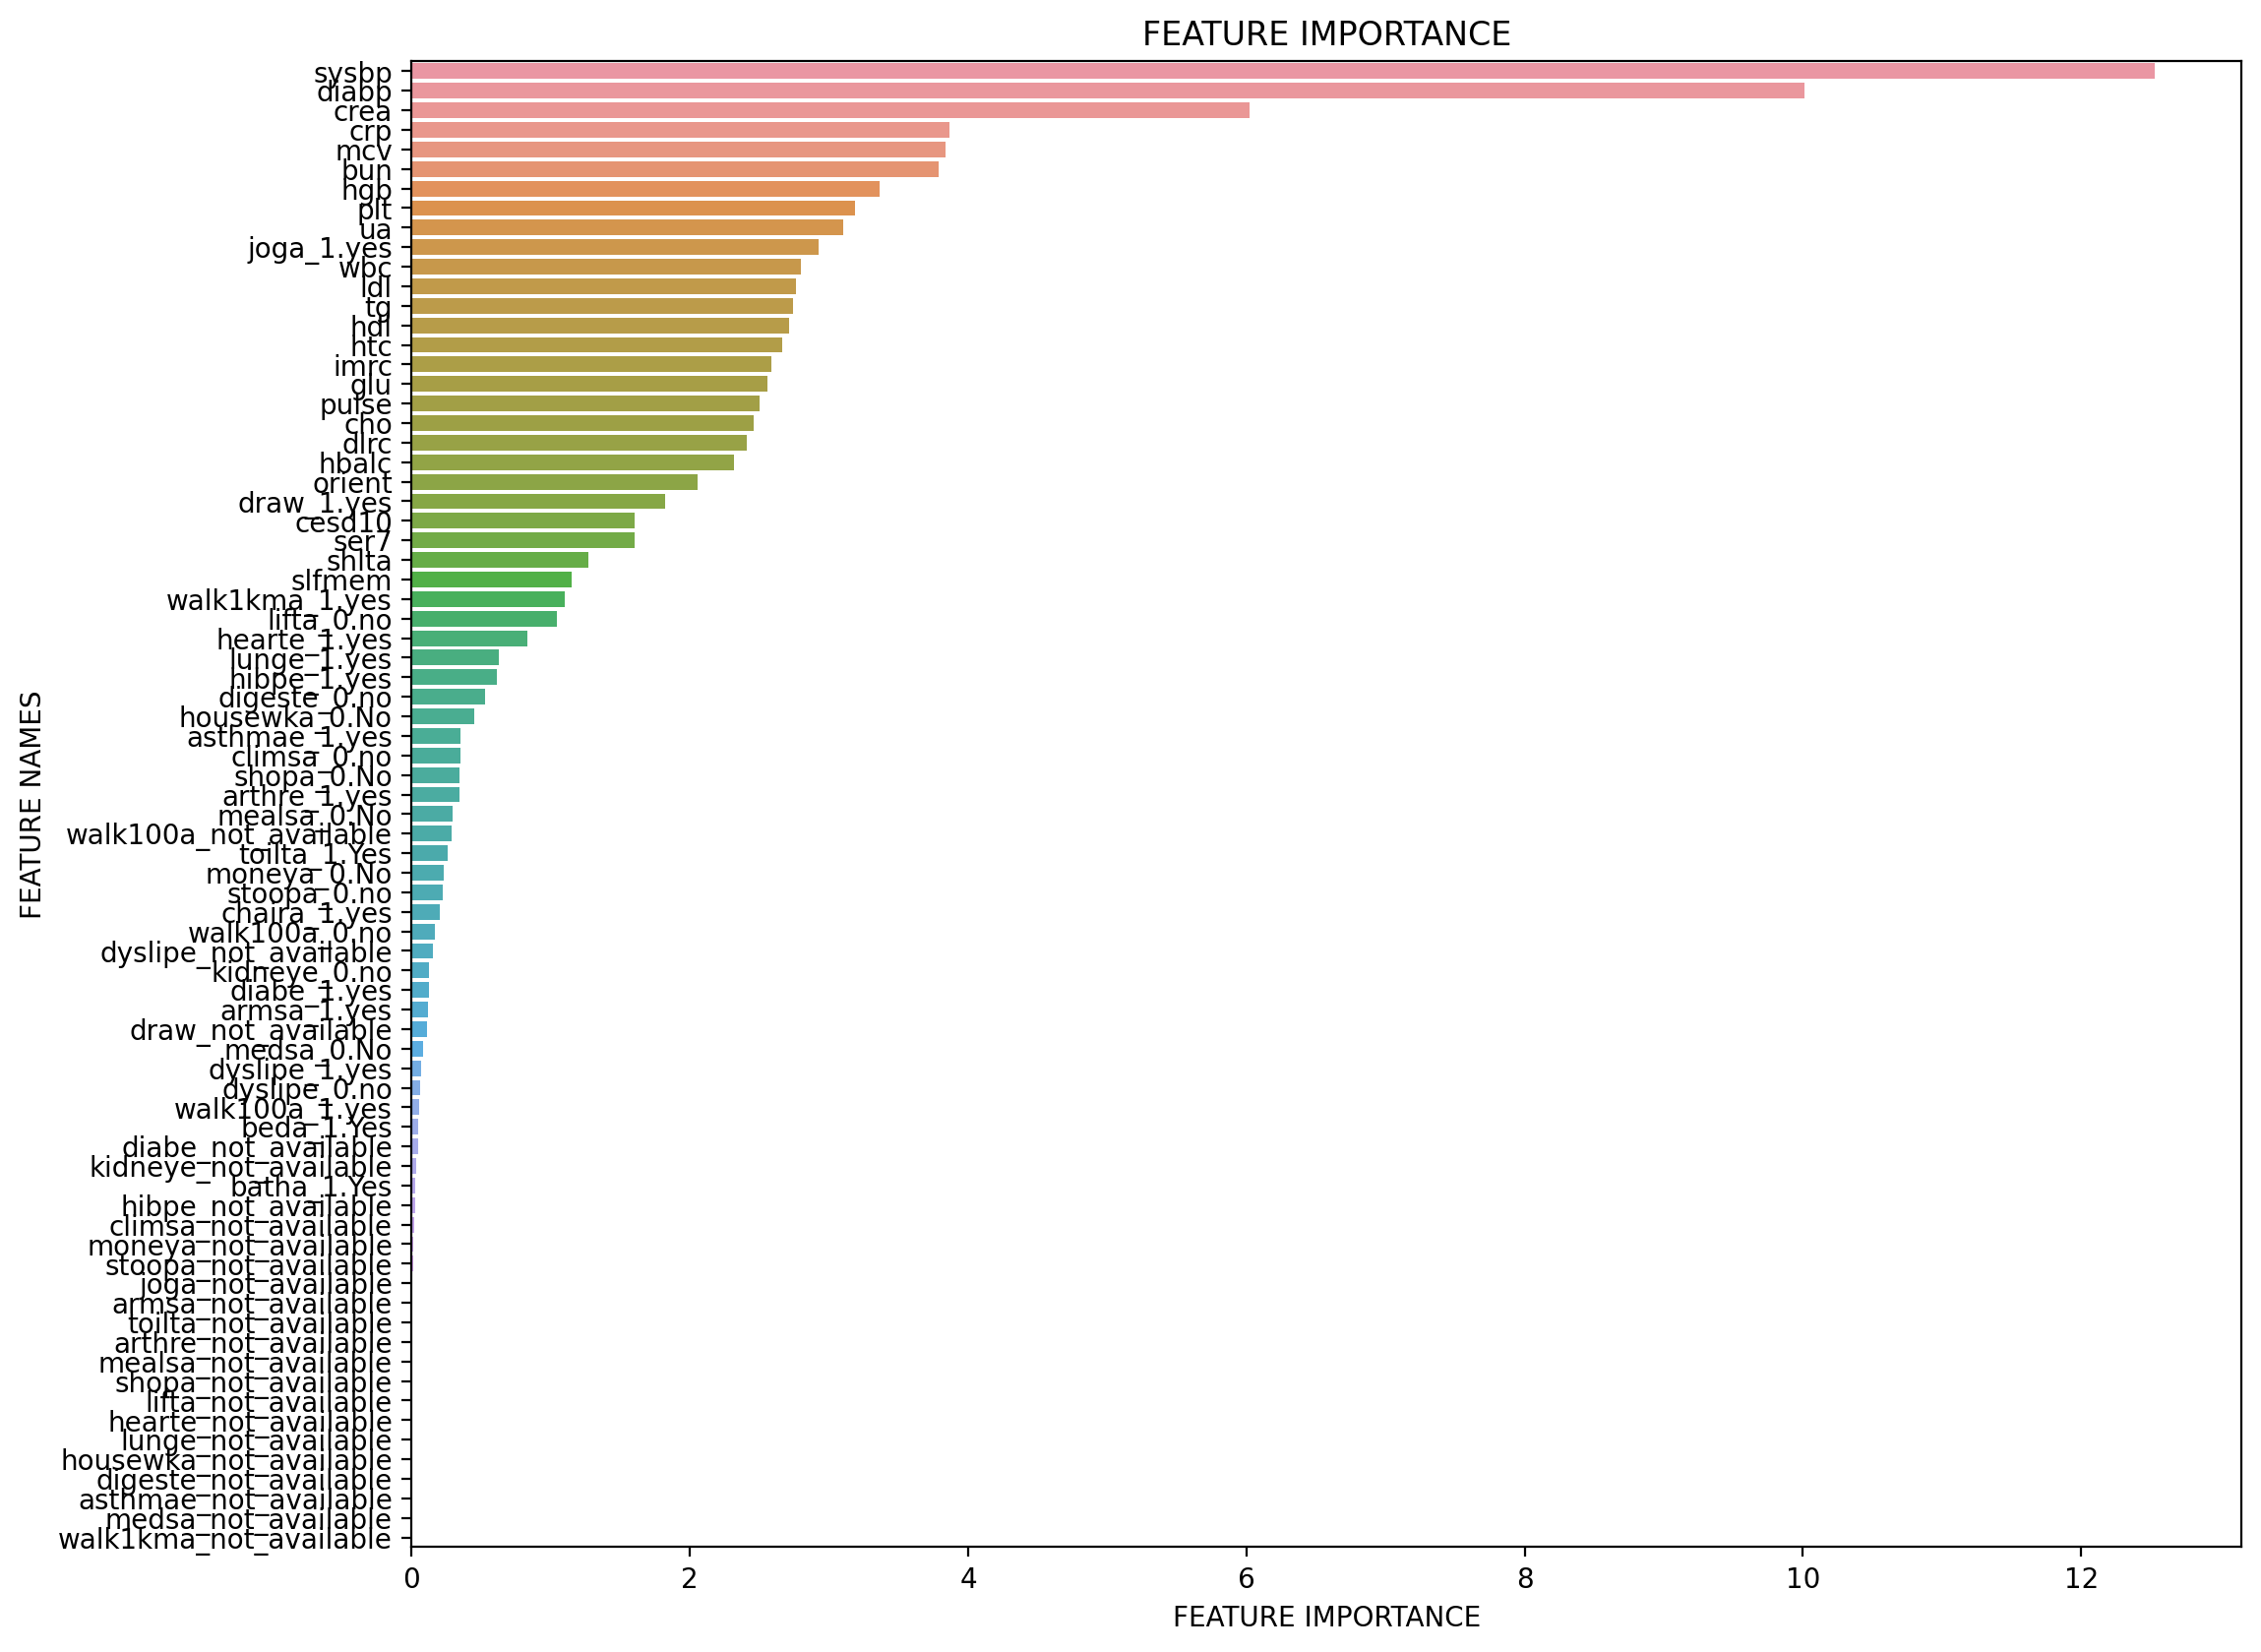

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)


    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


    plt.figure(figsize=(12,10),dpi=200)

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(cat.feature_importances_,cat.feature_names_,'')

In [63]:
dd = pd.read_stata('2011ForPred.dta')

pred = predict_model(cat,data=dd)

pred['res']= pred['Label']-pred['age']
pred['five'] = pred.res.apply(lambda x: 1 if abs(x) <=5 else 0)
pred['ten'] = pred.res.apply(lambda x: 1 if abs(x) <=10 else 0)

pred = pred.reset_index(drop=True)
#pred.to_stata('2011Pred_result.dta',write_index=False)

In [64]:
pred.head()

,ID,householdID,sysbp,diabp,pulse,wbc,mcv,plt,bun,glu,...,imrc,dlrc,ser7,orient,draw,age,Label,res,five,ten
0,010104101002,0101041010,123.666664,67.333336,55.333332,9.6,72.900002,198.0,19.438940,95.940002,...,10.0,7.0,5.0,4.0,0.no,48.166668,48.8924,0.725732,1,1
1,010104104001,0101041040,178.666672,87.000000,55.000000,7.5,88.300003,271.0,22.099890,105.839996,...,6.0,6.0,2.0,3.0,0.no,60.833332,61.3774,0.544068,1,1
2,010104105002,0101041050,191.000000,106.333336,58.333332,4.7,86.099998,208.0,15.629580,87.480003,...,6.0,7.0,5.0,3.0,0.no,67.666664,52.8171,-14.849564,0,0
3,010104107001,0101041070,118.333336,54.000000,53.666668,8.3,85.599998,290.0,13.220720,95.760002,...,4.0,6.0,4.0,3.0,0.no,79.333336,62.5336,-16.799736,0,0
4,010104108001,0101041080,100.000000,64.333336,63.666668,4.6,79.900002,294.0,20.027149,89.279999,...,2.0,1.0,2.0,1.0,0.no,55.833332,55.3023,-0.531032,1,1


In [65]:
pred.five.value_counts()

1    4103
0    2541
Name: five, dtype: int64

In [66]:
pred.shape

(6644, 68)